# Welcome to the Beginner Python Workshop 

**Topic: Scripting and plotting with a dataset**

This notebook will give you a basic introduction to the Python world. Some of the topics mentioned below is also covered in the [tutorials and tutorial videos](https://github.com/GuckLab/Python-Workshops/tree/main/tutorials)

Eoghan O'Connell, Guck Division, MPL, 2021

In [1]:
# notebook metadata you can ignore!
info = {"workshop": "05",
        "topic": ["solution", "exercise",
                  "scripting", "plotting", "pandas",
                  "matplotlib", "csv", "iris", "data",
                  "curve fitting"],
        "version" : "0.0.1"}

### How to use this notebook

- Click on a cell (each box is called a cell). Hit "shift+enter", this will run the cell!
- You can run the cells in any order!
- The output of runnable code is printed below the cell.
- Check out this [Jupyter Notebook Tutorial video](https://www.youtube.com/watch?v=HW29067qVWk).

See the help tab above for more information!


# What is in this Workshop?
In this notebook we cover:
- How to do the exercise from Workshop 05

In [2]:
# import necessary modules
%matplotlib nbagg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

### Excercises

- Scripting
  - You have a excel spreadsheet and want to fit your data with a polynomial curve
     - Filter the data, do some maths on the columns
  - You need to create a plot displaying this curve fit, along with the following
     - Subfigures describing the data, axis labels, error bars
        - Histogram
        - Grouped plots (box, violin)
       
     - Saved figure needs to be publication-ready resolution


In [3]:
df = pd.read_csv(r"../data/iris.csv")

In [4]:
df.head() # prints the first five values of the file

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail() # prints the last five values of the file

,sepallength,sepalwidth,petallength,petalwidth,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<IPython.core.display.Javascript object>


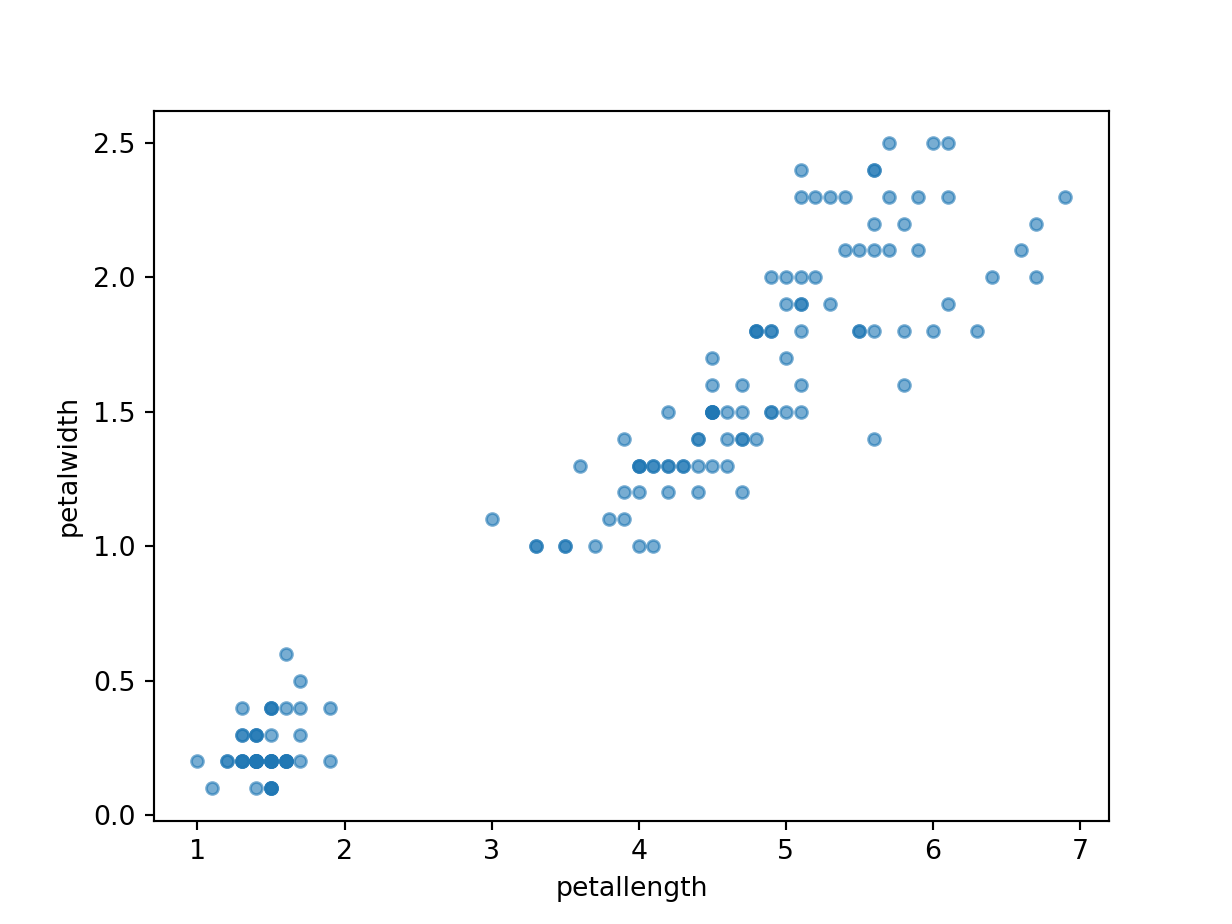

<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

In [6]:
df.plot.scatter(x="petallength", y="petalwidth", alpha=0.6)

<IPython.core.display.Javascript object>


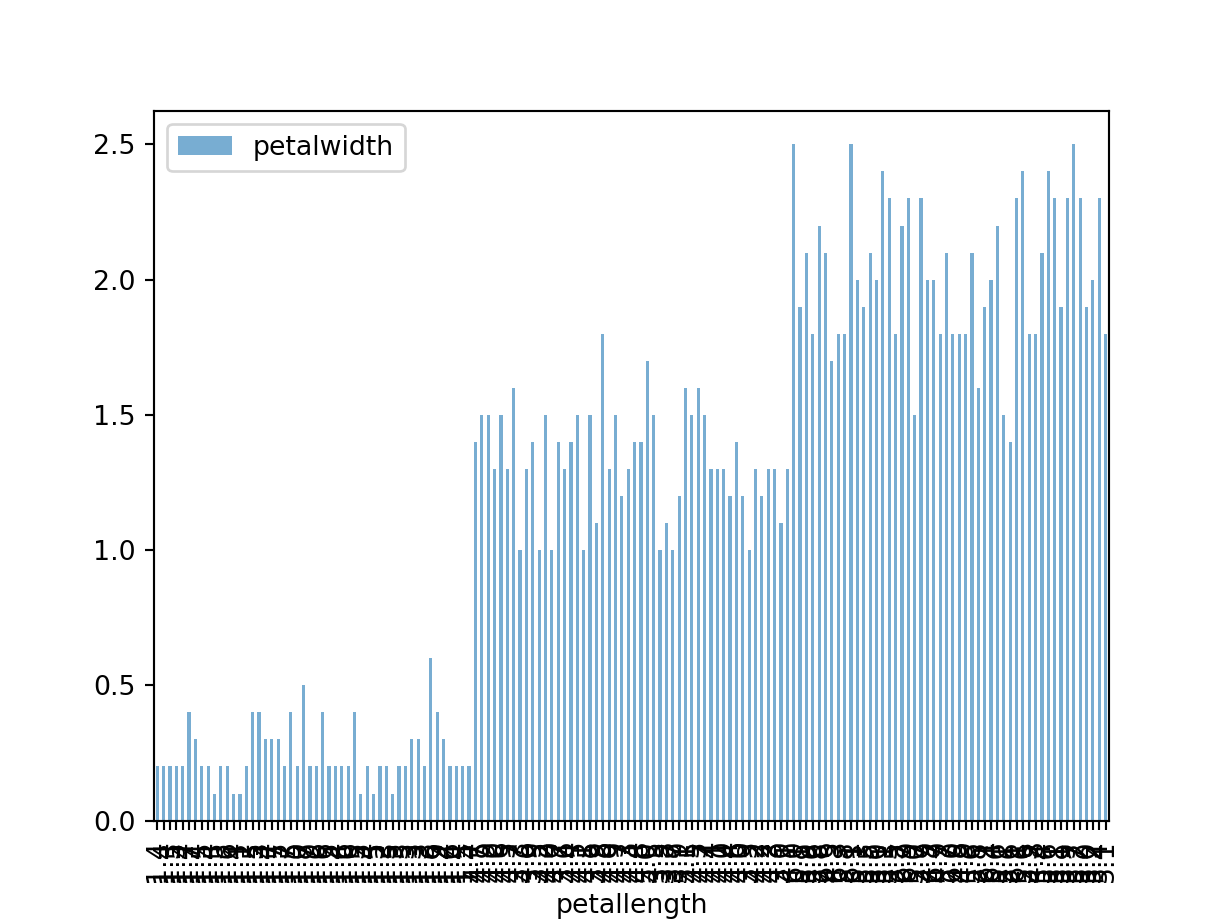

<AxesSubplot:xlabel='petallength'>

In [7]:
df.plot.bar(x="petallength", y="petalwidth", alpha=0.6)

<IPython.core.display.Javascript object>


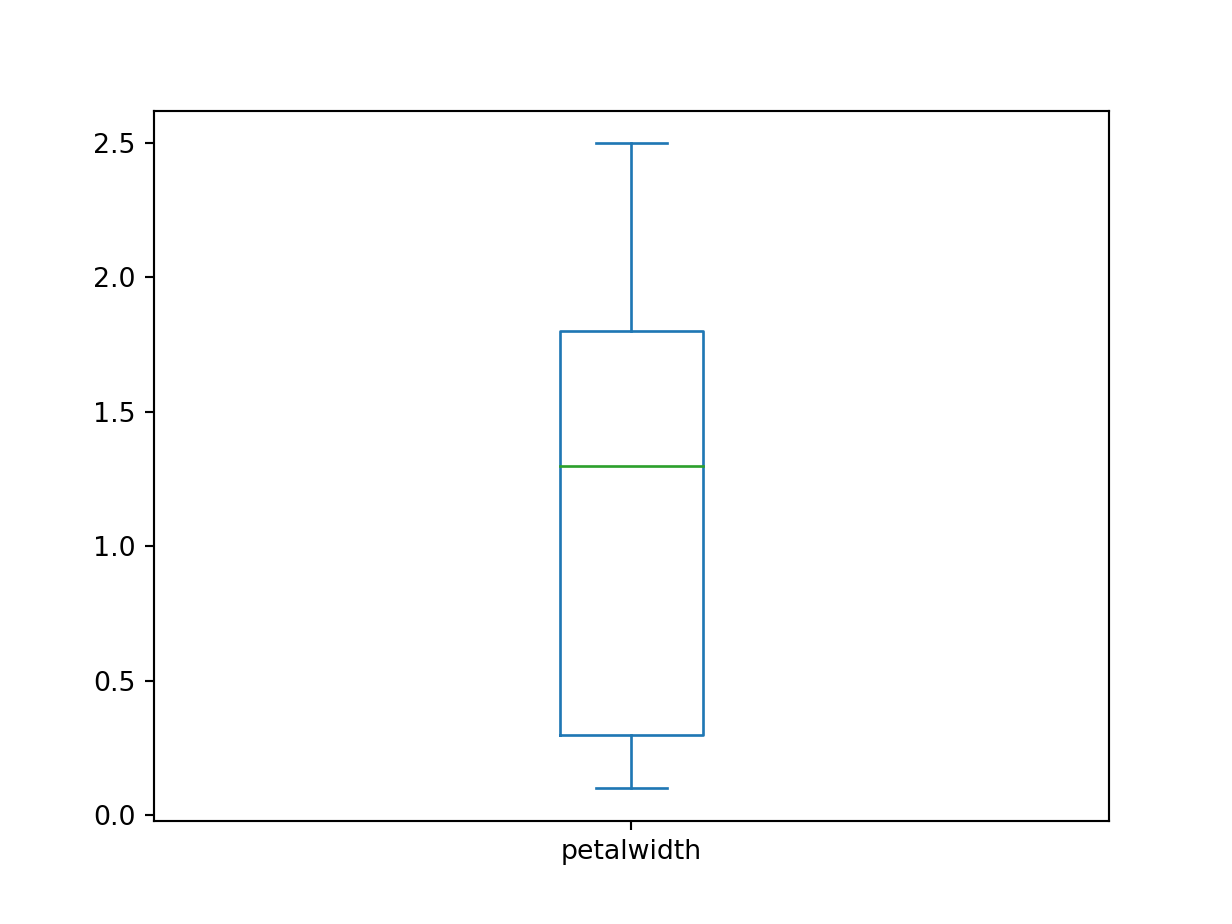

<AxesSubplot:>

In [8]:
df.plot.box(x="petallength", y="petalwidth")

<IPython.core.display.Javascript object>


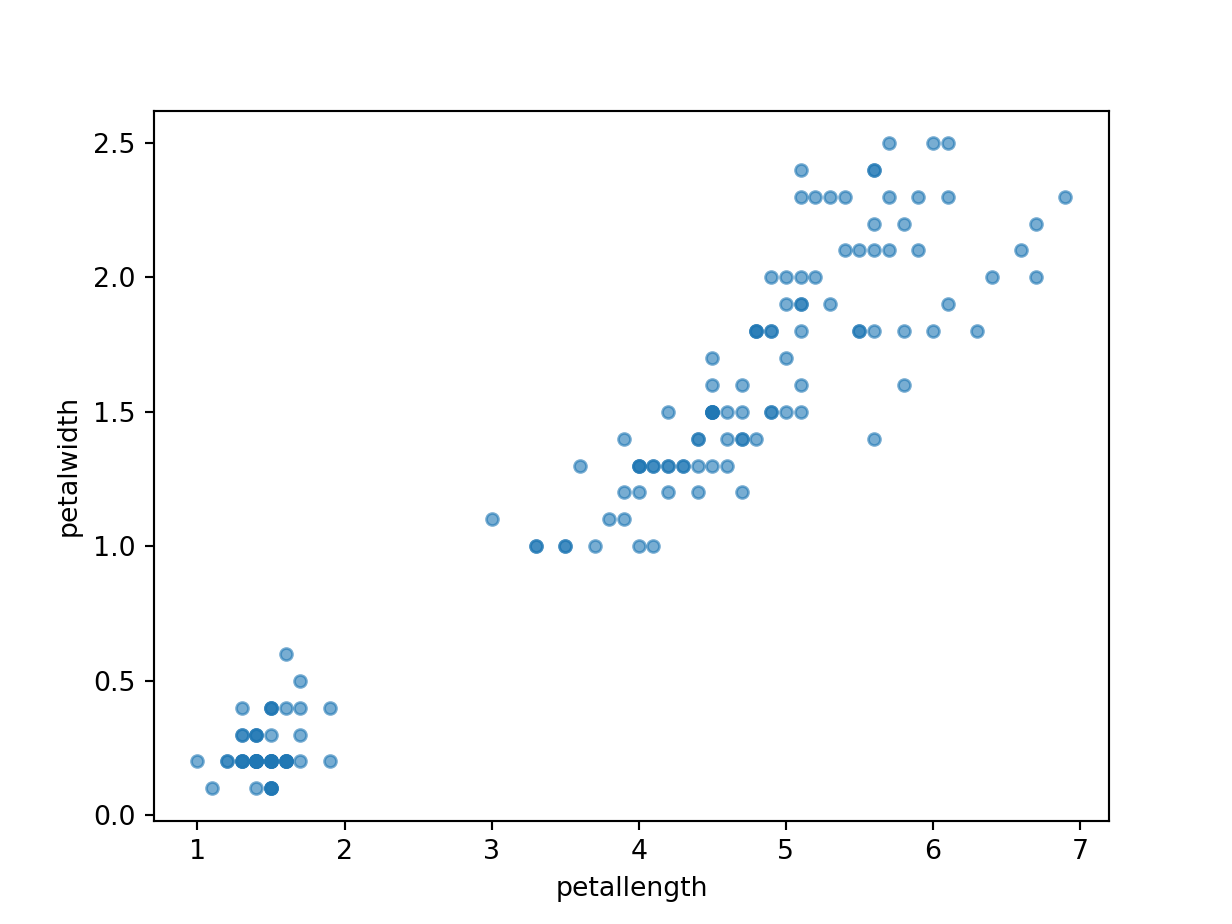

<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

In [9]:
df.plot.scatter(x="petallength", y="petalwidth", alpha=0.6)

In [10]:
def linear_fit(x, m, c):
    y = (m * x) + c
    return(y)

In [11]:
x_data = df['petallength']
y_fit= linear_fit(x= x_data, m=0.5, c=0)
print(y_fit)

0      0.70
1      0.70
2      0.65
3      0.75
4      0.70
       ... 
145    2.60
146    2.50
147    2.60
148    2.70
149    2.55
Name: petallength, Length: 150, dtype: float64


In [12]:
x_data = df['petallength']
y_data = df['petalwidth']
popt, pcov = curve_fit(linear_fit, x_data, y_data)

In [13]:
popt

array([ 0.41641913, -0.36651405])

In [14]:
pcov

array([[ 9.24009095e-05, -3.47304220e-04],
       [-3.47304220e-04,  1.59114368e-03]])

<IPython.core.display.Javascript object>


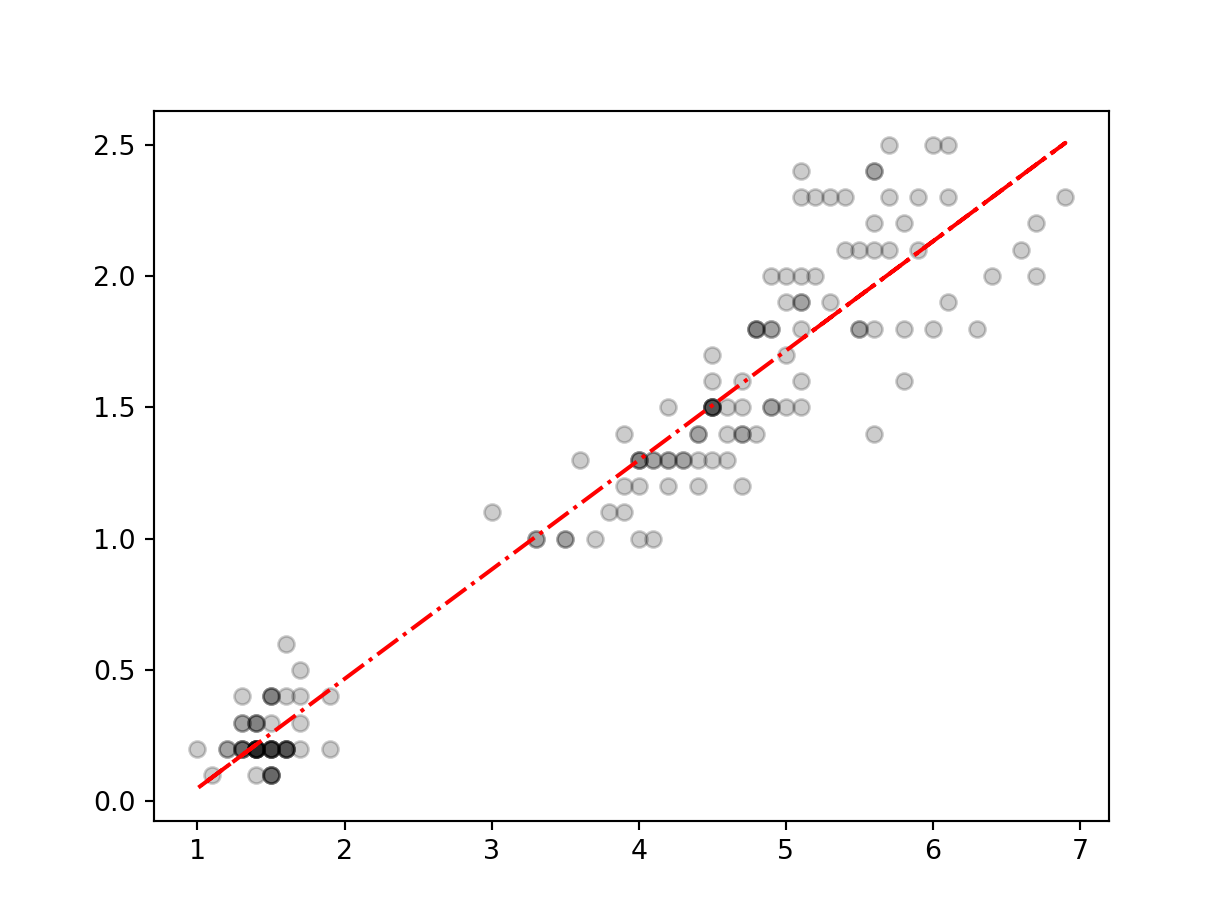

In [15]:
plt.figure() #creates new plot figure
plt.scatter(x_data, y_data, alpha=0.2, color='black')
plt.plot(x_data, linear_fit(x_data, *popt), "r-.")
plt.show()
plt.savefig(r"../data/Liner_fit_plot_3.png", dpi=300)